## 03 实现简单线性回归法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

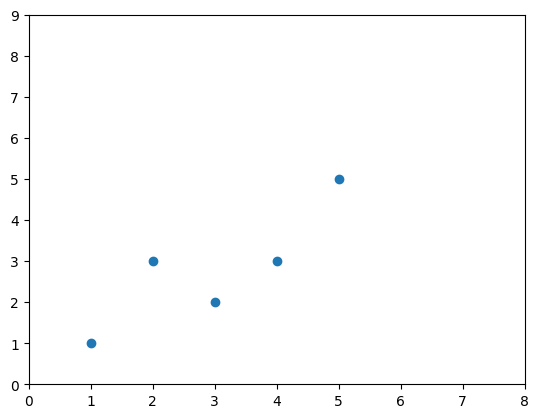

In [3]:
plt.scatter(x, y)
plt.axis([0, 8, 0, 9]) # 确定横纵坐标的位置
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
# https://www.runoob.com/python/python-func-zip.html
zip(x, y)
print(zip(x,y))
print(list(zip(x,y)))

[(1.0, 1.0), (2.0, 3.0), (3.0, 2.0), (4.0, 3.0), (5.0, 5.0)]


In [6]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [7]:
a = num/d

In [8]:
b = y_mean - a * x_mean

In [9]:
y_hat = a * x + b

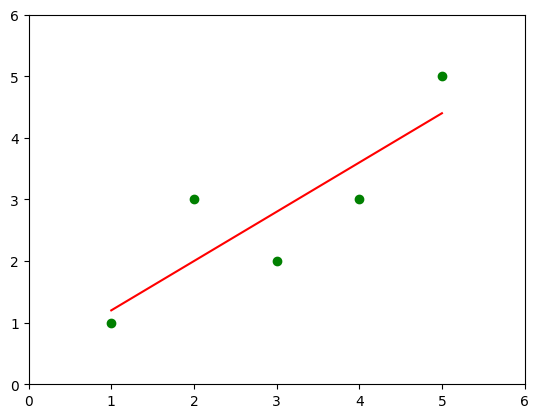

In [10]:
plt.scatter(x, y, color = 'g') # scatter: 点图； plot: 线图
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

In [11]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

### 封装我们自己的SimpleLinearRegression

代码参见 [这里](playML/SimpleLinearRegression.py)

In [12]:
from playML.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [13]:
reg1.a_

0.8

In [14]:
reg1.b_

0.39999999999999947

In [15]:
y_hat1 = reg1.predict(x)

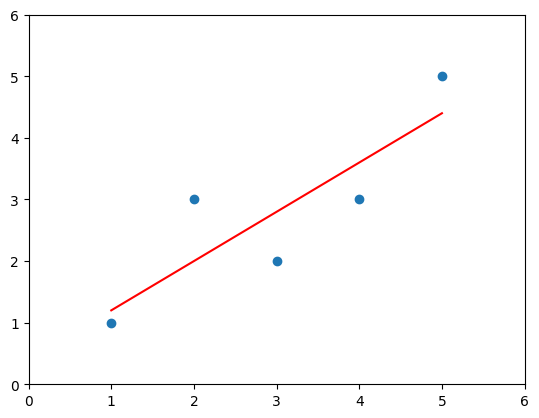

In [16]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

### 向量化实现SimpleLinearRegression

代码参见 [这里](playML/SimpleLinearRegression.py)

In [17]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x, y)
reg2.predict(np.array([x_predict]))

array([5.2])

In [18]:
reg2.a_

0.8

In [19]:
reg2.b_

0.39999999999999947

### 向量化实现的性能测试

In [20]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

575 ms ± 42.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.7 ms ± 958 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
reg1.a_

2.0050198641068246

In [22]:
reg1.b_

2.9979628590774103

In [23]:
reg2.a_

2.0050198641067367

In [24]:
reg2.b_

2.997962859077454